#Machine Learning Classifiers (CLO 2,3,4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# used for working with arrays
import numpy as np 
# for creating and removing a directory (folder), 
import os
# for data analysis
import pandas as pd
# for graphs
import matplotlib.pyplot as plt
import seaborn as sns
# provides various functions that work on iterators to produce complex iterators
import itertools
# to generate random numbers
import random
# for creating static, animated, and interactive visualizations
import matplotlib.gridspec as gridspec 
#provides a selection of efficient tools for machine learning and statistical modeling
#
from sklearn.preprocessing import LabelEncoder
# To divide data in training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt

In [ ]:
Dataset_PATH="/content/drive/MyDrive/"
file_path_20_percent = os.path.join(Dataset_PATH,'KDDTrain+_20Percent.txt') #20% subset of NSL-KDD train set
file_path_full_training_set = os.path.join(Dataset_PATH,'KDDTrain+.txt') #The complete train set of NSL-KDD
file_path_test = os.path.join(Dataset_PATH,'KDDTest+.txt')  #NSL-KDD's complete test set

df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [ ]:
df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17.1', '0.03',
       '0.17.2', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df.describe() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
test_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [ ]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_state'] = is_attack
test_df['attack_state'] = test_attack

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [ ]:
(df.attack_state == 1).sum()/len(df)

0.4654208871812784

In [ ]:
(test_df.attack_state == 1)

0         True
1        False
2         True
3         True
4        False
         ...  
22538    False
22539    False
22540     True
22541    False
22542     True
Name: attack_state, Length: 22543, dtype: bool

In [ ]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','U2R','R2L']

def class_attack(attack):
    if attack in DoS_attacks:
        attack_type = 1
    elif attack in Probe_attacks:
        attack_type = 2
    elif attack in U2R:
        attack_type = 3
    elif attack in R2L:
        attack_type = 4
    else:
        attack_type = 0       
    return attack_type
attack_class = df.attack.apply(class_attack)
df['attack_class'] = attack_class

test_attack_class = test_df.attack.apply(class_attack)
test_df['attack_class'] = test_attack_class

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


# FEATURE SELECTION


In [ ]:
normal = df[df.attack_class == 0]

In [ ]:
normal_test= test_df[test_df.attack_class == 0]

In [ ]:
DDoS = df[df.attack_class == 1]

In [ ]:
DDoS_test= test_df[test_df.attack_class == 1 ]

In [ ]:
total_data = pd.concat([normal, DDoS], ignore_index=True)

In [ ]:
total_data_test = pd.concat([normal_test, DDoS_test], ignore_index=True)

In [ ]:
total_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
2,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
3,0,tcp,http,SF,287,2251,0,0,0,0,...,0.12,0.03,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,http,SF,300,13788,0,0,0,0,...,0.01,0.02,0.00,0.00,0.0,0.00,normal,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113273,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1,1
113274,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1,1
113275,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1,1
113276,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20,1,1


In [ ]:
total_data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0,0
1,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0,0
2,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.00,0.00,0.00,0.0,0.72,0.04,normal,21,0,0
3,0,tcp,http,SF,327,467,0,0,0,0,...,0.01,0.03,0.00,0.0,0.00,0.00,normal,21,0,0
4,0,tcp,smtp,SF,616,330,0,0,0,0,...,0.00,0.00,0.00,0.0,0.33,0.00,normal,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,1
17310,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,20,1,1
17311,1,tcp,smtp,SF,2599,293,0,0,0,0,...,0.00,0.00,0.00,0.0,0.26,0.00,mailbomb,11,1,1
17312,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,0.00,0.0,0.00,0.00,smurf,20,1,1


In [ ]:
corr= total_data.corr()
corr_y = abs(corr['attack_class'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

wrong_fragment                 0.114329
dst_host_diff_srv_rate         0.120568
diff_srv_rate                  0.148637
dst_host_same_src_port_rate    0.152444
rerror_rate                    0.188424
srv_rerror_rate                0.189330
dst_host_srv_rerror_rate       0.189395
dst_host_rerror_rate           0.195263
dst_host_srv_diff_host_rate    0.209941
srv_diff_host_rate             0.269118
level                          0.291393
dst_host_count                 0.499389
logged_in                      0.683938
count                          0.697502
dst_host_srv_count             0.718766
dst_host_same_srv_rate         0.759970
serror_rate                    0.784962
srv_serror_rate                0.785355
dst_host_serror_rate           0.785537
dst_host_srv_serror_rate       0.791293
same_srv_rate                  0.865364
attack_state                   0.999835
attack_class                   1.000000
Name: attack_class, dtype: float64

In [ ]:
len(df.columns)

45

In [ ]:
lowest_corr = corr_y[corr_y < 0.1]
lowest_corr.sort_values(ascending=True)

is_host_login         0.002454
urgent                0.005486
num_compromised       0.009487
land                  0.009519
num_root              0.010741
num_shells            0.015168
num_failed_logins     0.017768
src_bytes             0.018203
su_attempted          0.021169
num_file_creations    0.021936
root_shell            0.029048
srv_count             0.032086
num_access_files      0.035374
dst_bytes             0.040432
hot                   0.052324
is_guest_login        0.072774
duration              0.082010
Name: attack_class, dtype: float64

In [ ]:
corr= total_data_test.corr()
corr_y = abs(corr['attack_class'])
highest_corr_test = corr_y[corr_y >0.1]
highest_corr_test.sort_values(ascending=True)

diff_srv_rate                  0.144034
duration                       0.165151
dst_host_srv_diff_host_rate    0.180977
dst_host_diff_srv_rate         0.189095
level                          0.199219
srv_diff_host_rate             0.269138
srv_serror_rate                0.413560
serror_rate                    0.414029
dst_host_serror_rate           0.415862
dst_host_srv_serror_rate       0.426524
count                          0.449259
dst_host_count                 0.505173
dst_host_srv_rerror_rate       0.563519
srv_rerror_rate                0.571160
rerror_rate                    0.575963
dst_host_srv_count             0.576420
logged_in                      0.587308
dst_host_rerror_rate           0.612013
dst_host_same_srv_rate         0.620080
same_srv_rate                  0.664162
attack_state                   0.983222
attack_class                   1.000000
Name: attack_class, dtype: float64

In [ ]:
highest_corr_columns= highest_corr.index

In [ ]:
highest_corr_test_columns= highest_corr_test.index

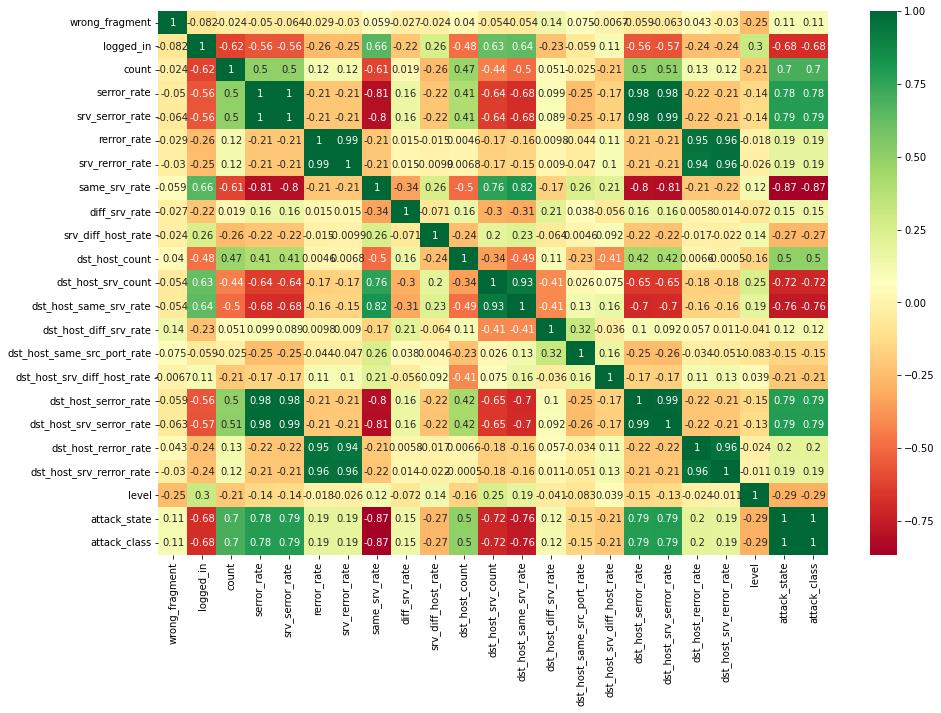

In [ ]:
plt.figure(figsize=(15,10))
g=sns.heatmap(total_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

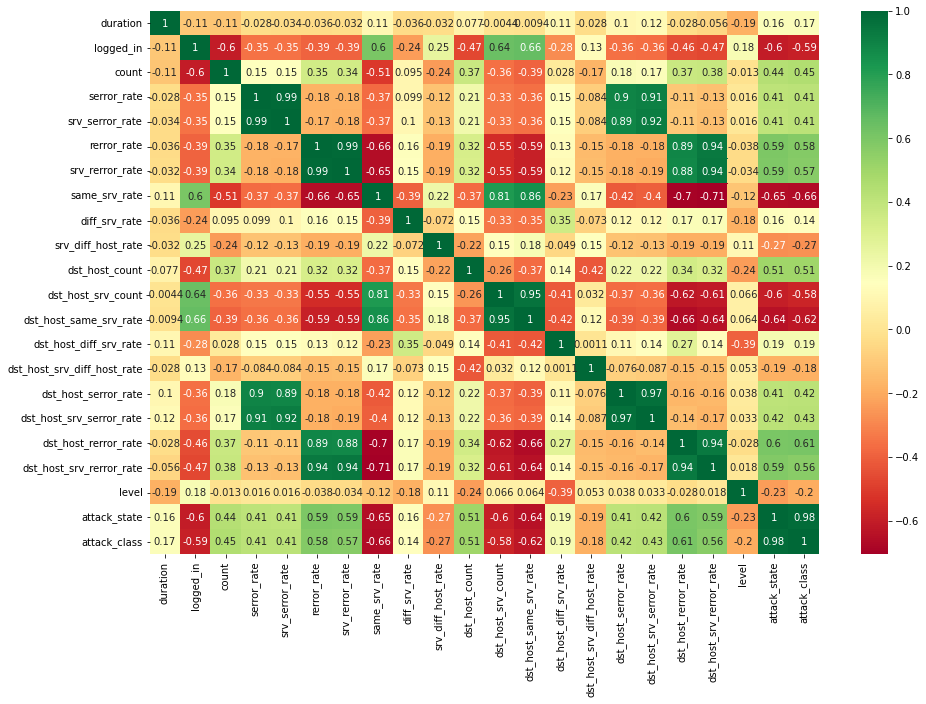

In [ ]:
plt.figure(figsize=(15,10))
g=sns.heatmap(total_data_test[highest_corr_test.index].corr(),annot=True,cmap="RdYlGn")

We have displayed the attributes most associated with DDoS attacks in the correlation matrix and heat map. Now let's train our dataset by deleting the attributes other than these attributes.

In [ ]:
drop_cols = df.loc[:,[i for i in list(df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                  
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'                          
]]]

In [ ]:
#drop_cols = ['wrong_fragment','duration','src_bytes','dst_bytes','land','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_count']  
df.drop(drop_cols, axis=1, inplace=True)  
df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_state,attack_class
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,1
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,0
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,0
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1


In [ ]:
drop_cols1 = test_df.loc[:,[i for i in list(test_df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',                          
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                 
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'
]]]


In [ ]:
#drop_cols = ['src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_count' ,'dst_host_same_src_port_rate']  
test_df.drop(drop_cols1, axis=1, inplace=True)  
test_df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_state,attack_class
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,1
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,0
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,2
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,2
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0,0
22539,0,1,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0,0
22540,0,1,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,1
22541,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0,0


In [ ]:
data = df.copy()

In [ ]:
test_data = test_df.copy()

In [ ]:
X_train=data.loc[:, data.columns != "attack_class"]
y_train=data['attack_class']
X_test=test_data.loc[:, test_data.columns != "attack_class"]
y_test=test_data['attack_class']

# CLASSIFICATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
X_test= mms.transform(X_test)

**DECISION TREE**

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))
acc1 = accuracy_score(y_test ,dt_pred)
pre = precision_score(y_test ,dt_pred,average='weighted',labels=np.unique(dt_pred))
rec = recall_score(y_test ,dt_pred,average='weighted')
f1 = f1_score(y_test ,dt_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.8627068269529344
PRECISON :  0.8832800768376803
RECALL :  0.8627068269529344
F1_SCORE :  0.8655733075620292


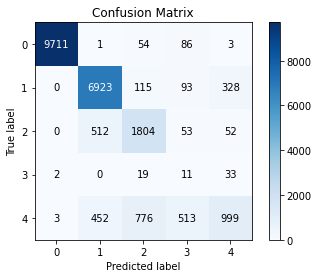

In [ ]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [ ]:
print(classification_report(y_test, dt_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.88      0.93      0.90      7459
           2       0.65      0.75      0.70      2421
           3       0.01      0.17      0.03        65
           4       0.71      0.36      0.48      2743

    accuracy                           0.86     22543
   macro avg       0.65      0.64      0.62     22543
weighted avg       0.88      0.86      0.87     22543



**GRADIENT BOOSTING CLASSIFIER**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
X_test= mms.transform(X_test)

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
gc = GradientBoostingClassifier()
gc.fit(X_train,y_train)
gb_pred = gc.predict(X_test)
#finding different scores
acc6 = accuracy_score(y_test ,gb_pred)
pre = precision_score(y_test ,gb_pred,average='weighted',labels=np.unique(gb_pred))
rec = recall_score(y_test ,gb_pred,average='weighted')
f1 = f1_score(y_test ,gb_pred,average='weighted')
print('ACCURACY : ',acc6)
print('PRECISON : ',pre)
print('CLASSIFIER RECALL : ',rec)
print('CLASSIFIER F1_SCORE : ',f1)



ACCURACY :  0.8792973428558755
PRECISON :  0.8822075290631267
CLASSIFIER RECALL :  0.8792973428558755
CLASSIFIER F1_SCORE :  0.8725681703936151


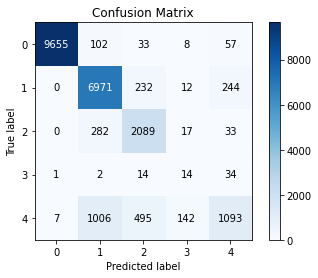

In [ ]:
splt.plot_confusion_matrix(y_test, gb_pred)

In [ ]:
print(classification_report(y_test, gb_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9855
           1       0.83      0.93      0.88      7459
           2       0.73      0.86      0.79      2421
           3       0.07      0.22      0.11        65
           4       0.75      0.40      0.52      2743

    accuracy                           0.88     22543
   macro avg       0.68      0.68      0.66     22543
weighted avg       0.88      0.88      0.87     22543



**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
acc1 = accuracy_score(y_test ,knn_pred)
pre = precision_score(y_test ,knn_pred,average='weighted',labels=np.unique(knn_pred))
rec = recall_score(y_test ,knn_pred,average='weighted')
f1 = f1_score(y_test ,knn_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.8514394712327552
PRECISON :  0.8591550121657909
RECALL :  0.8514394712327552
F1_SCORE :  0.8255212902615074


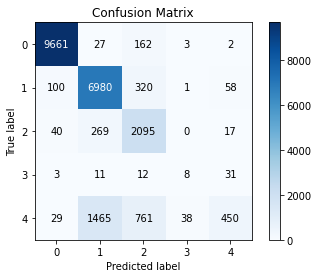

In [ ]:
splt.plot_confusion_matrix(y_test, knn_pred)

In [ ]:
print(classification_report(y_test, knn_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9855
           1       0.80      0.94      0.86      7459
           2       0.63      0.87      0.73      2421
           3       0.16      0.12      0.14        65
           4       0.81      0.16      0.27      2743

    accuracy                           0.85     22543
   macro avg       0.67      0.61      0.60     22543
weighted avg       0.86      0.85      0.83     22543



**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver='liblinear')
lr = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
#finding different scores
acc1 = accuracy_score(y_test ,lr_pred)
pre = precision_score(y_test ,lr_pred,average='weighted',labels=np.unique(lr_pred))
rec = recall_score(y_test ,lr_pred,average='weighted')
f1 = f1_score(y_test ,lr_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('REGRESSION RECALL : ',rec)
print('REGRESSION F1_SCORE : ',f1)

ACCURACY :  0.862751186621124
PRECISON :  0.8607080420547606
REGRESSION RECALL :  0.862751186621124
REGRESSION F1_SCORE :  0.8340098506292306


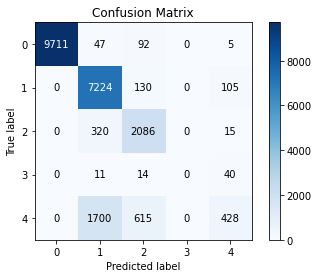

In [ ]:
splt.plot_confusion_matrix(y_test, lr_pred)

In [ ]:
print(classification_report(y_test, lr_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.78      0.97      0.86      7459
           2       0.71      0.86      0.78      2421
           3       0.00      0.00      0.00        65
           4       0.72      0.16      0.26      2743

    accuracy                           0.86     22543
   macro avg       0.64      0.59      0.58     22543
weighted avg       0.86      0.86      0.83     22543



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(X_train,y_train)
rm_pred=rm.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, rm_pred))
acc1 = accuracy_score(y_test ,rm_pred)
pre = precision_score(y_test ,rm_pred,average='weighted',labels=np.unique(rm_pred))
rec = recall_score(y_test ,rm_pred,average='weighted')
f1 = f1_score(y_test ,rm_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.8866610477753626
PRECISON :  0.8960470060020584
RECALL :  0.8866610477753626
F1_SCORE :  0.8811595238583589


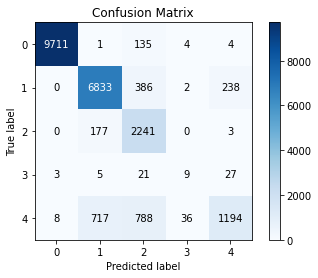

In [ ]:
splt.plot_confusion_matrix(y_test, rm_pred)

In [ ]:
print(classification_report(y_test, rm_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.88      0.92      0.90      7459
           2       0.63      0.93      0.75      2421
           3       0.18      0.14      0.16        65
           4       0.81      0.44      0.57      2743

    accuracy                           0.89     22543
   macro avg       0.70      0.68      0.67     22543
weighted avg       0.90      0.89      0.88     22543



**SUPPORT VECTOR MACHINES**

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))
#finding different scores
acc1 = accuracy_score(y_test ,svm_pred)
pre = precision_score(y_test ,svm_pred,average='weighted',labels=np.unique(svm_pred))
rec = recall_score(y_test ,svm_pred,average='weighted')
f1 = f1_score(y_test ,svm_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.8563190347336201
PRECISON :  0.8419791689105116
RECALL :  0.8563190347336201
F1_SCORE :  0.8300528942696195


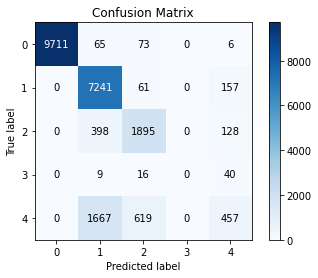

In [ ]:
splt.plot_confusion_matrix(y_test, svm_pred)

In [ ]:
print(classification_report(y_test, svm_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.77      0.97      0.86      7459
           2       0.71      0.78      0.75      2421
           3       0.00      0.00      0.00        65
           4       0.58      0.17      0.26      2743

    accuracy                           0.86     22543
   macro avg       0.61      0.58      0.57     22543
weighted avg       0.84      0.86      0.83     22543



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**NAIVE BAYES**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
# print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))
acc1 = accuracy_score(y_test ,gnb_pred)
pre = precision_score(y_test ,gnb_pred,average='weighted',labels=np.unique(gnb_pred))
rec = recall_score(y_test ,gnb_pred,average='weighted')
f1 = f1_score(y_test ,gnb_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.6924544204409351
PRECISON :  0.870560362893413
RECALL :  0.6924544204409351
F1_SCORE :  0.711216054391033


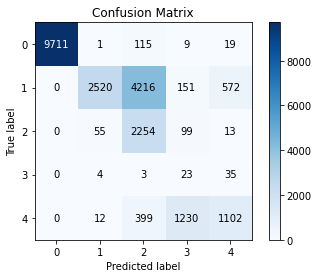

In [ ]:
splt.plot_confusion_matrix(y_test, gnb_pred)

In [ ]:
print(classification_report(y_test, gnb_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.34      0.50      7459
           2       0.32      0.93      0.48      2421
           3       0.02      0.35      0.03        65
           4       0.63      0.40      0.49      2743

    accuracy                           0.69     22543
   macro avg       0.59      0.60      0.50     22543
weighted avg       0.87      0.69      0.71     22543

